<a href="https://colab.research.google.com/github/amolprabhu/Hotel_Booking_Analysis/blob/main/Amol_Prabhu_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA) is one of the most important steps to understanding the data. EDA uses various codes and graphs which help us in understanding every column of the data and what they represent.EDA can help us summarise data and use it for further analysis.

In this EDA, as a beginner I have tried my best to understand various aspects of the data and explain the analysis performed. 

The data is of hotel booking analysis which explains various aspects such as country, average daily rate of booking, type of the hotel, status of booking, special requests made, parking spaces needed etc.

Through this EDA, I have been able to apply the various concepts learnt and make us of different visualisations to illustrate some aspects of the data.

For this EDA, I have worked in 4 major steps:

**1. Preparing the notebook for analysis**

**2. Cleaning the data**

**3. Analyzing the data**

**4. Conclusions**


### **1. PREPARING THE NOTEBOOK FOR ANALYSIS**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
#Importing data and saving into a variable called 'data'
data = pd.read_csv('/content/drive/MyDrive/Alma Better/Hotel Booking Analysis/Hotel Bookings.csv')

In [5]:
#Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#First 5 entries of the dataset
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### **2. CLEANING THE DATA**

In this subsection, I have mainly focussed on making the data simpler and easier to understand.

For example, the company column has majority null values and they cannot be used to make concrete analysis.

I felt for this EDA, it would be useful to change certain values that were binary in nature (0 and 1) to YES and NO

In [7]:
#NA values in company column
data['company'].isna().sum()

112593

In [8]:
#Dropping company column due to many NA values
data.drop('company', axis = 1, inplace= True)

In [9]:
#Dropping other columns which will not be part of the analysis
data.drop(['arrival_date_week_number','arrival_date_day_of_month','agent'],axis=1,inplace=True)

In [10]:
#Checking if the column 'company' exists in the data
'company' in data.columns

False

In [11]:
#Creating a function to convert binary data of 'canceled' column to 'NO' and 'YES'
def cancel(rows):
  """ function takes in rows as input as converts 0 and 1 
      values to NO and YES respectively """
  if rows == 0:
    return 'NO'
  else:
    return "YES"

In [12]:
#Applying function on the column
data['is_canceled'] = data['is_canceled'].apply(cancel)

In [13]:
#Seeing the counts of cancelled and not cancelled
data['is_canceled'].value_counts()

NO     75166
YES    44224
Name: is_canceled, dtype: int64

In [14]:
#Checking for null values in the data
data.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

In [15]:
#Calculating the median of the 'children' column
data['children'].median()

0.0

In [16]:
#Filling 4 na values of children with median of children
data.loc[data['children'].isna(),'children'] = data['children'].median()

In [17]:
# checking na values after filling na values in children column
data.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

In [18]:
#Filtering the main dataset to extract only the data which have country information
no_na_countries = data.loc[~data['country'].isna()]

In [19]:
#Checking for null values countries based dataset
no_na_countries.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

In [20]:
#Getting statistical calculations of all numeric columns
data.describe()

,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


**3. ANALYZING THE DATA**

1. Types of hotels

In [21]:
#Types of hotels and their counts
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Text(0.5, 1.0, 'TYPE OF HOTELS')

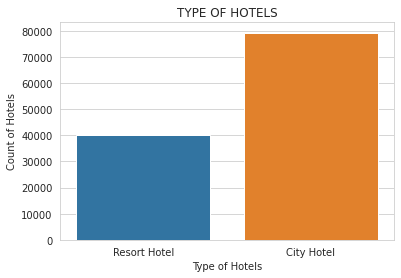

In [22]:
#Types of hotels and their counts
sns.set_style('whitegrid')
sns.countplot(data = data, x = 'hotel')
plt.xlabel('Type of Hotels')
plt.ylabel('Count of Hotels')
plt.title('TYPE OF HOTELS')

Text(0.5, 1.0, 'YEARLY HOTEL BOOKINGS')

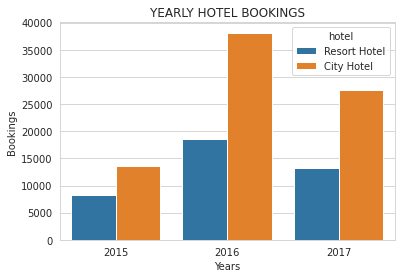

In [23]:
#Year wise and hotel wise booking
sns.countplot(data=data, x = data['arrival_date_year'], hue = data['hotel'])
plt.xlabel('Years')
plt.ylabel('Bookings')
plt.title('YEARLY HOTEL BOOKINGS')

2. Monthly bookings

In [24]:
#Busy months or holiday seasons globally
monthly_bookings = data['arrival_date_month'].value_counts()

Text(0.5, 1.0, 'GLOBAL MONTHLY BOOKINGS')

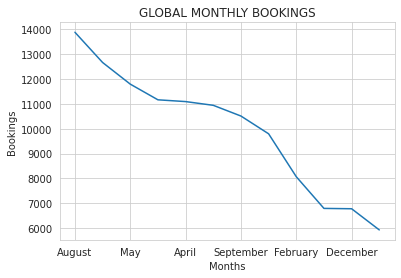

In [25]:
#Graphical representation of monthly bookings globally
monthly_bookings.plot(kind='line')
plt.rcParams['figure.figsize'] = (8,5)
plt.xlabel('Months')
plt.ylabel('Bookings')
plt.title('GLOBAL MONTHLY BOOKINGS')

3. Total bookings monthly and yearly

In [26]:
#Number of adults, children and babies booking yearly and monthly
data.groupby(['arrival_date_year','arrival_date_month']).agg({'adults':'sum','children':'sum','babies':'sum'})

adults  children  babies
arrival_date_year arrival_date_month                          
2015              August                7545     428.0      67
                  December              5208     216.0      46
                  July                  5423     266.0      26
                  November              3714      72.0      21
                  October               8860     192.0      32
                  September             9512     183.0      31
2016              April                 9994     453.0      24
                  August               10351    1168.0      81
                  December              7174     520.0      32
                  February              6866     322.0      27
                  January               3696     116.0      23
                  July                  9118     924.0      59
                  June                  9637     423.0      41
                  March                 8784     443.0      34
                  May                   9982     406.0      32
                  November              7774     207.0      24
                  October              11419     511.0      30
                  September            10169     415.0      56
2017              April                10812     688.0      29
                  August                9899    1184.0      48
                  February              7584     468.0      32
                  January               6328     336.0      25
                  July                 10623    1132.0      36
                  June                 10716     634.0      30
                  March                 8891     257.0      23
                  May                  11557     439.0      40

4. Understanding the average lead time for all the bookings

In [27]:
#Average lead time for bookings of hotels globally
sum(data['lead_time'])/data['lead_time'].count()

104.01141636652986

5. Type of meals preferred

In [28]:
#Type of meal preferred globally
global_meals = data['meal'].value_counts()

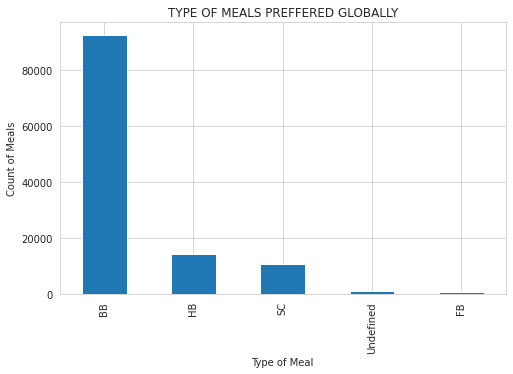

In [29]:
#Graph showing type of meals preffered globally
global_meals.plot(kind='bar')
plt.xlabel('Type of Meal')
plt.ylabel('Count of Meals')
plt.title('TYPE OF MEALS PREFFERED GLOBALLY')
plt.grid(b=True)

6. Working on the countries of origin column

As we know the 'countries' column includes 488 null values, for analysis of the countries column we will use only the non null values.

In [30]:
#Most number of bookings based on country of origin
no_na_countries['country'].value_counts()


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
KIR        1
SDN        1
BDI        1
BWA        1
MDG        1
Name: country, Length: 177, dtype: int64

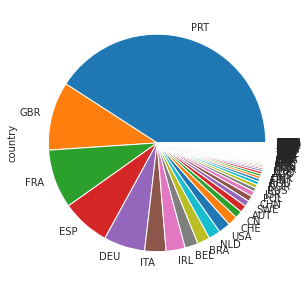

In [31]:
#Graphical representation of the above
no_na_countries['country'].value_counts().plot(kind='pie')

In [32]:
#Country of origin with weekend and weekday bookings
global_stays = no_na_countries.groupby('country').agg({'stays_in_weekend_nights':'sum','stays_in_week_nights':'sum'})

In [33]:
#Country of origin with highest weekend stay bookings
global_stays.sort_values('stays_in_weekend_nights',ascending=False).head()

,stays_in_weekend_nights,stays_in_week_nights
country,,
PRT,35908,105746
GBR,16297,41795
FRA,10130,26417
DEU,7134,18653
ESP,7106,19252


7. Understanding the segments through which the bookings happened

In [34]:
#Understanding the method of bookings used
data['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

8. Understanding the cancellation of bookings in different months

In [35]:
#Checking cancellation in different months
data[data['is_canceled']=="YES"].groupby(['is_canceled','arrival_date_month'])['arrival_date_month'].count().sort_values()

is_canceled  arrival_date_month
YES          January               1807
             November              2122
             December              2371
             February              2696
             March                 3149
             September             4116
             October               4246
             April                 4524
             June                  4535
             May                   4677
             July                  4742
             August                5239
Name: arrival_date_month, dtype: int64

9. Understanding the different segments through which the bookings were made for each year

Text(0.5, 1.0, 'ARRIVAL YEAR WITH MARKET SEGMENTS')

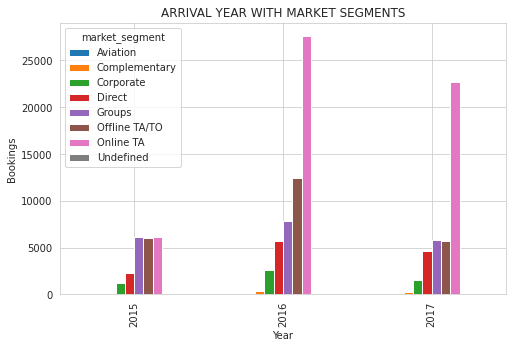

In [36]:
#Graph showing different market segments for every year
data.groupby(['arrival_date_year','market_segment'])['market_segment'].count().unstack().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Bookings')
plt.title('ARRIVAL YEAR WITH MARKET SEGMENTS')

10. Finding out the repeated guests

The 'repeated guests' column includes binary values(0 and 1) which are being converted to 'YES' and 'NO' for easier understanding

In [37]:
#Converting binary values of the column to YES and NO
data['is_repeated_guest'] = data['is_repeated_guest'].apply(cancel)

In [38]:
#To understand repeated guests
data['is_repeated_guest'].value_counts()

NO     115580
YES      3810
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'COUNT OF REPEATED GUESTS')

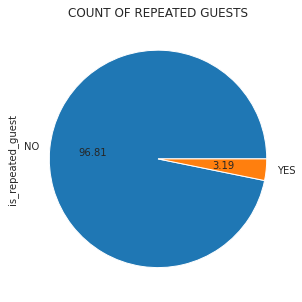

In [39]:
#Graphical representations of repeated guests
data['is_repeated_guest'].value_counts().plot(kind='pie',autopct="%.2f")
plt.title('COUNT OF REPEATED GUESTS')

11. Understanding previous cancellations

Most of the bookings havent been cancelled previously

In [40]:
#Previous cancellation of bookings
data['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

12. Exploring the 'reserved' and 'assigned' room type columns

In [41]:
#Customers who got the room type as they reserved for
matching_room_types = data[data['reserved_room_type'] == data['assigned_room_type']]

In [42]:
#Percentage of customers who get room types same as reserved for
matching_room_types['assigned_room_type'].count()/data['assigned_room_type'].count()*100

87.50565373984422

In [43]:
#To understand most reserved room type
data['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

13. Booking changes made by different countries

In [44]:
#Countries with highest booking changes
no_na_countries.groupby('country')['booking_changes'].sum().sort_values(ascending=False).head()

country
PRT    8252
GBR    3435
FRA    2271
ESP    2063
DEU    1660
Name: booking_changes, dtype: int64

14. Understanding the different deposit types used for bookings

Text(0.5, 1.0, 'DEPOSOT TYPE USED FOR BOOKINGS')

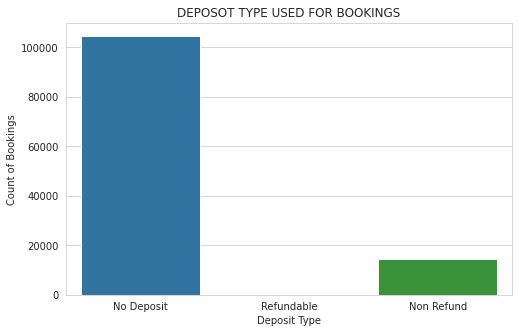

In [45]:
#Graph showing deposit type used for bookings
sns.countplot(data=data, x = data['deposit_type'])
plt.xlabel('Deposit Type')
plt.ylabel('Count of Bookings')
plt.title('DEPOSOT TYPE USED FOR BOOKINGS')

15. Highest average waiting time of bookings originating from different countries

In [46]:
#Top 5 country of origin of bookings with highest average dayes in waiting list
no_na_countries.groupby('country')['days_in_waiting_list'].mean().sort_values(ascending=False).head()

country
ISL    55.771930
NZL    25.175676
AUT     6.479810
ISR     5.464873
DOM     4.857143
Name: days_in_waiting_list, dtype: float64

16. Different type of customers who make the bookings

Text(0.5, 1.0, 'TYPES OF CUSTOMERS')

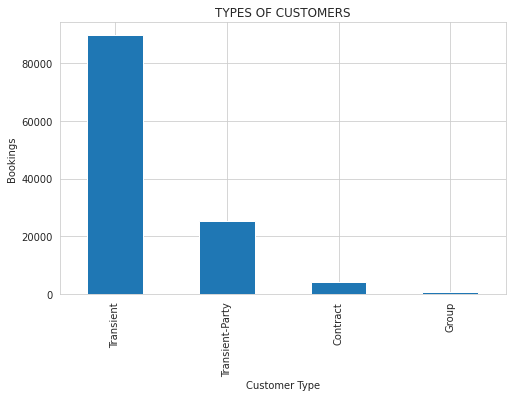

In [47]:
#identifying different customer types
data['customer_type'].value_counts()

# Graphical representation of the above
data['customer_type'].value_counts().plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Bookings')
plt.title('TYPES OF CUSTOMERS')

17. Working with average daily rates

In [48]:
#Top 5 countries of origin of bookings with highest mean average daily rates in their currency
no_na_countries.groupby('country')['adr'].mean().sort_values(ascending=False).head()

country
DJI    273.000000
AIA    265.000000
AND    202.652857
UMI    200.000000
LAO    181.665000
Name: adr, dtype: float64

In [49]:
#Subsetting bookings from Portugal
prt = no_na_countries[no_na_countries['country'] == 'PRT']

In [50]:
#Identifying mean of average daily rate for booking originating from Portugal
prt.groupby('country')['adr'].mean()

country
PRT    92.041483
Name: adr, dtype: float64

18. Car spaces required during booking

In [51]:
#Showing the car parking spaces required as per the booking
data['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

19. Customer types with their special requests and required car spaces

In [52]:
#Understanding the customer types with car parkings required and special requests made
data.groupby('customer_type').agg({'total_of_special_requests':'sum','required_car_parking_spaces':'sum'})

,total_of_special_requests,required_car_parking_spaces
customer_type,,
Contract,2971,135
Group,372,51
Transient,56598,6440
Transient-Party,8274,838


### **I was curious to find out where bookings origanting from India stand in the dataset and my curiousity led me to analyze some of the aspects related to India.**

Subsetting the indian origin dataset from the original dataset

In [53]:
#Filtering out bookings from India
indian_hotels = data[data['country'] == "IND"]

In [54]:
#Checking for the top 5 entries of the Indian bookings dataset
indian_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
937,Resort Hotel,NO,4,2015,August,0,2,2,1.0,0,BB,IND,Online TA,TA/TO,NO,0,0,D,D,1,No Deposit,0,Transient,226.0,0,4,Check-Out,2015-08-09
1791,Resort Hotel,NO,11,2015,September,1,2,2,2.0,0,BB,IND,Online TA,TA/TO,NO,0,0,H,H,0,No Deposit,0,Transient,160.0,0,0,Check-Out,2015-09-17
2541,Resort Hotel,NO,40,2015,October,0,3,2,0.0,0,BB,IND,Online TA,TA/TO,NO,0,0,D,D,0,No Deposit,0,Transient,56.0,1,3,Check-Out,2015-10-24
6766,Resort Hotel,YES,62,2016,July,0,2,2,2.0,0,BB,IND,Online TA,TA/TO,NO,0,0,G,G,0,No Deposit,0,Transient,220.0,0,0,Canceled,2016-05-01
7071,Resort Hotel,YES,17,2016,July,0,3,2,0.0,0,BB,IND,Online TA,TA/TO,NO,0,0,A,A,0,No Deposit,0,Transient,191.0,0,0,Canceled,2016-07-02


21. Identifying the different types of hotel bookings orignating from India

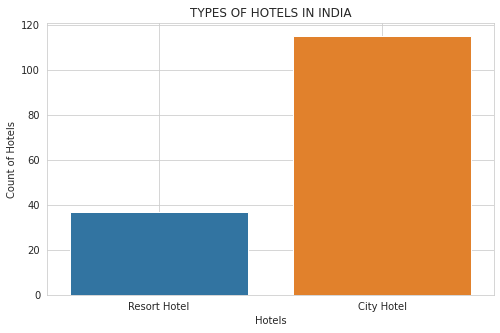

In [55]:
#Different types of hotel bookings by Indians
sns.countplot(x=indian_hotels['hotel'])
plt.xlabel('Hotels')
plt.ylabel('Count of Hotels')
plt.title('TYPES OF HOTELS IN INDIA')
plt.grid(b=True)

21. Understanding the busiest time for bookings from India

In [56]:
#Busiest time for hotel bookings originating from India
indian_hotels['arrival_date_month'].value_counts()

November     27
April        24
May          22
July         14
June         13
October      11
December      9
September     8
March         8
February      7
January       6
August        3
Name: arrival_date_month, dtype: int64

22. Cancellations of bookings and thier cancellation rates from the Indian origin

In [57]:
#Cancelations of bookings by Indians
india_booking_cancel = indian_hotels.loc[indian_hotels['is_canceled'] == "YES", 'is_canceled'].count()

In [58]:
#Cancelation rate of bookings originating from India

#Total bookings orignating from India
india_total_booking = indian_hotels['is_canceled'].count()

#Cancelation rate
print(india_booking_cancel/india_total_booking*100)

23.026315789473685


23. Average lead time for hotel bookings originating from India

In [59]:
#Average lead time for hotel bookings originating from India
sum(indian_hotels['lead_time'])/indian_hotels['lead_time'].count()

48.89473684210526

### **4. CONCLUSION**

From the various analysis done above, we have understood where countries stand in terms of hotel bookings.
The dataset is a very informative one and shows us different aspects related to hotel bookings.

We have understood that Portugal as country of origin is highest in terms of global bookings, average lead time globally is 104 days approximately, there are more city hotels than resort hotels globally, the busiest month globally is August.

In terms of booking originating from India, we found that the trend is totally different compared to the global trends. For example, the busiest month is November, the average lead time for hotel bookings is 48 days approximately.

The dataset can be further analysed by using complex algorithms to understant and predict various aspects such as cancellations, booking seasons, etc.